In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

# Уровень значимости для статистических тестов (вынесено, чтобы избежать магических значений)
ALPHA = 0.05

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

x    float64
y    float64
dtype: object


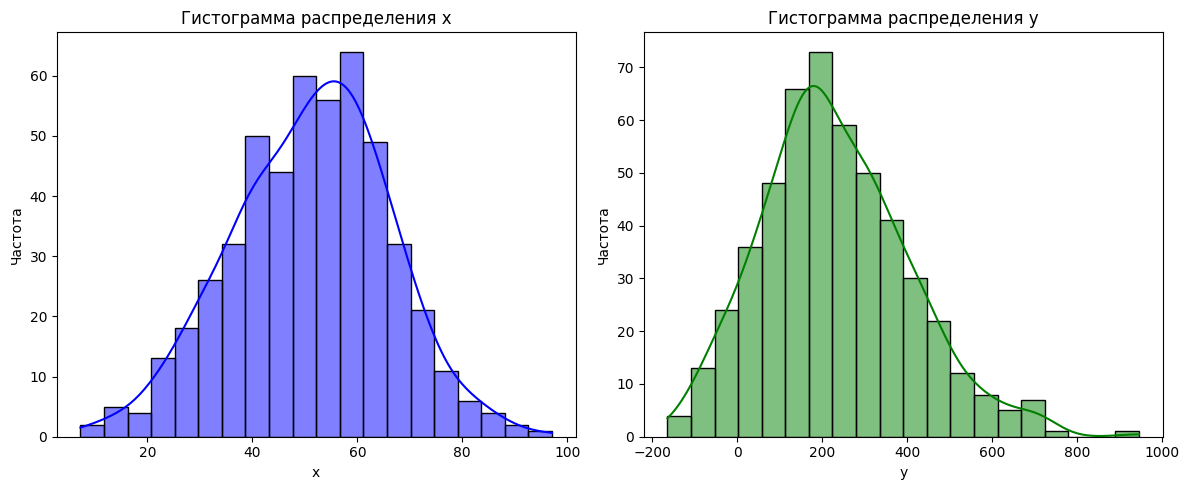

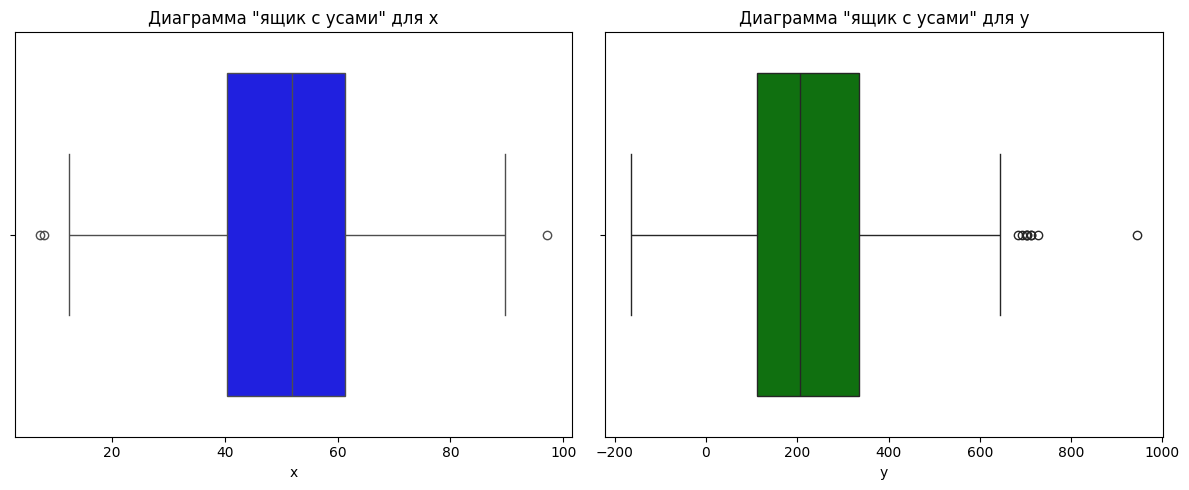

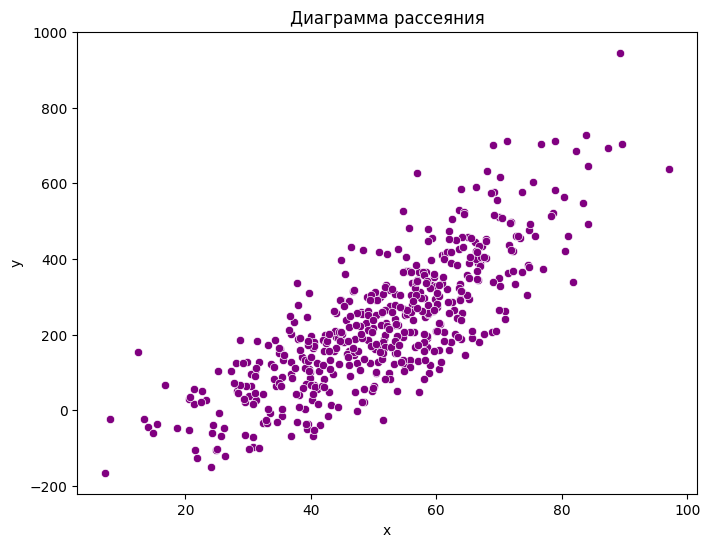

Корреляция Пирсона между x и y: 0.8032
Сильная линейная зависимость между x и y.
На основе гистограмм, диаграмм "ящик с усами" и диаграммы рассеяния:
Распределение данных для x и y относительно симметрично, коэффициент корреляции Пирсона может быть подходящим.


In [73]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа

# построение гистограмм распределения

# построение "ящика с усами" для изучения выбросов

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков


# Считывание файла
df1 = pd.read_csv('ex1.csv')

# Проверка типов данных
print(df1.dtypes)

# Построение гистограмм распределения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df1['x'], kde=True, bins=20, color='blue')
plt.title('Гистограмма распределения x')
plt.xlabel('x')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(df1['y'], kde=True, bins=20, color='green')
plt.title('Гистограмма распределения y')
plt.xlabel('y')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Построение диаграмм "ящик с усами"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['x'], color='blue')
plt.title('Диаграмма "ящик с усами" для x')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['y'], color='green')
plt.title('Диаграмма "ящик с усами" для y')

plt.tight_layout()
plt.show()

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1['x'], y=df1['y'], color='purple')
plt.title('Диаграмма рассеяния')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Анализ целесообразности использования корреляции Пирсона
correlation = df1['x'].corr(df1['y'])
print(f'Корреляция Пирсона между x и y: {correlation:.4f}')

# Вывод
if abs(correlation) > 0.7:
    print('Сильная линейная зависимость между x и y.')
elif 0.5 < abs(correlation) <= 0.7:
    print('Умеренная линейная зависимость между x и y.')
elif 0.3 < abs(correlation) <= 0.5:
    print('Слабая линейная зависимость между x и y.')
else:
    print('Очень слабая или отсутствующая линейная зависимость между x и y.')

# Визуальный анализ
print('На основе гистограмм, диаграмм "ящик с усами" и диаграммы рассеяния:')
if df1['x'].skew() > 1 or df1['y'].skew() > 1:
    print('Распределение данных для x или y имеет заметное смещение, это может повлиять на применимость коэффициента корреляции Пирсона.')
else:
    print('Распределение данных для x и y относительно симметрично, коэффициент корреляции Пирсона может быть подходящим.')

Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [74]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона

# расчет t-критерия

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 


# считывание файла
df2 = pd.read_csv('ex2.csv') 

# Расчет коэффициента корреляции Пирсона
correlation = df2['x'].corr(df2['y'])

# Расчет p-значения
correlation, p_value = sc.stats.pearsonr(df2['x'], df2['y'])

# Расчет t-критерия
n = len(df2)
t_value = correlation * np.sqrt((n - 2) / (1 - correlation**2))

# Определение табличного значения t-критерия
df = n - 2  # Степени свободы
t_critical = sc.stats.t.ppf(1 - ALPHA / 2, df)

# Вывод результатов
print(f'Коэффициент корреляции Пирсона: {correlation:.4f}')
print(f'P-значение: {p_value:.4f}')
print(f'T-критерий: {t_value:.4f}')
print(f'Табличное значение t-критерия для {df} степеней свободы: {t_critical:.4f}')

# Вывод о степени корреляции и статистической значимости
if abs(correlation) > 0.7:
    correlation_strength = 'сильная'
elif 0.5 < abs(correlation) <= 0.7:
    correlation_strength = 'умеренная'
elif 0.3 < abs(correlation) <= 0.5:
    correlation_strength = 'слабая'
else:
    correlation_strength = 'очень слабая или отсутствующая'

if p_value < ALPHA:
    significance = 'статистически значима'
else:
    significance = 'не является статистически значимой'

if abs(t_value) > t_critical:
    t_significance = 'статистически значима'
else:
    t_significance = 'не является статистически значимой'

print(f'Корреляция между x и y: {correlation_strength}, {significance} (p < {ALPHA}).')
print(f'По t-критерию, корреляция: {t_significance} (|t| > {t_critical:.4f}).')

Коэффициент корреляции Пирсона: 0.7333
P-значение: 0.0000
T-критерий: 24.0712
Табличное значение t-критерия для 498 степеней свободы: 1.9647
Корреляция между x и y: сильная, статистически значима (p < 0.05).
По t-критерию, корреляция: статистически значима (|t| > 1.9647).


x    float64
y    float64
dtype: object


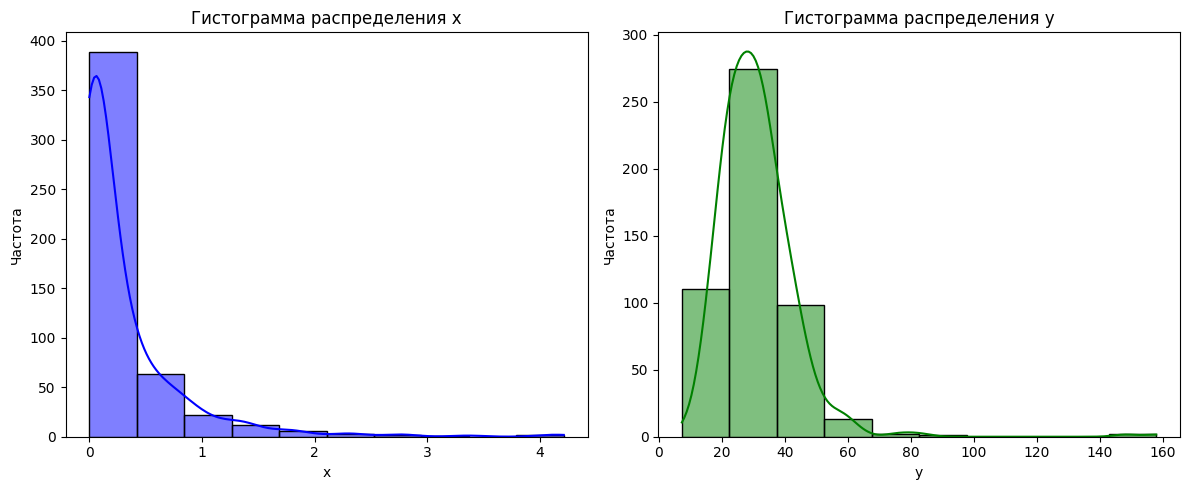

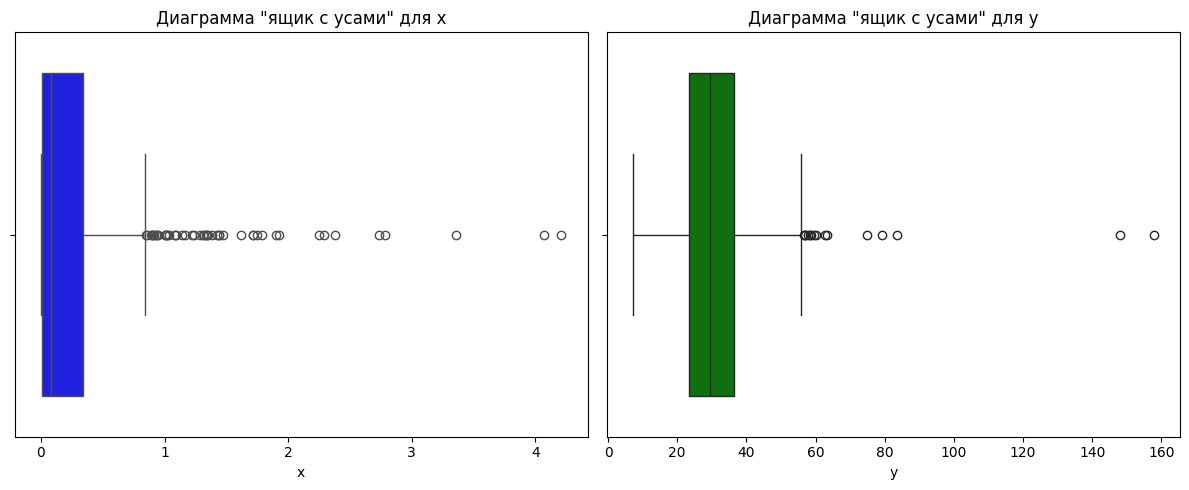

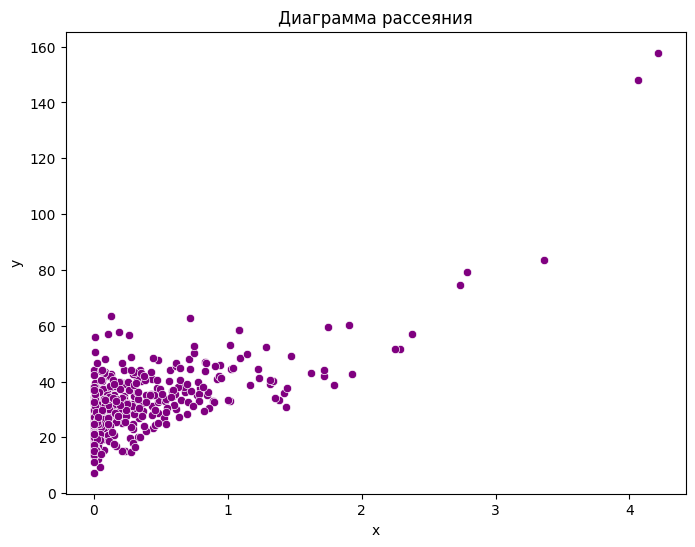

Анализ предшествующих графиков:
P-значение для нормальности распределения x: 0.0000
P-значение для нормальности распределения y: 0.0000
Распределения данных для x или y не являются нормальными. Рекомендуется использовать корреляцию Спирмена.
Наличие выбросов в данных. Рекомендуется использовать корреляцию Спирмена.
Сильная линейная зависимость. Можно использовать корреляцию Пирсона.


In [75]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа

# построение гистограмм распределения

# построение "ящика с усами" для изучения выбросов

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков


# Проверка типов данных
print(df2.dtypes)

# Построение гистограмм распределения
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df2['x'], kde=True, bins=10, color='blue')
plt.title('Гистограмма распределения x')
plt.xlabel('x')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(df2['y'], kde=True, bins=10, color='green')
plt.title('Гистограмма распределения y')
plt.xlabel('y')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['x'], color='blue')
plt.title('Диаграмма "ящик с усами" для x')

plt.subplot(1, 2, 2)
sns.boxplot(x=df2['y'], color='green')
plt.title('Диаграмма "ящик с усами" для y')

plt.tight_layout()
plt.show()

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['x'], y=df2['y'], color='purple')
plt.title('Диаграмма рассеяния')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Вывод о целесообразности использования корреляции Спирмена
print("Анализ предшествующих графиков:")

# Проверка нормальности распределения
normality_x = sc.stats.shapiro(df2['x']).pvalue
normality_y = sc.stats.shapiro(df2['y']).pvalue

print(f'P-значение для нормальности распределения x: {normality_x:.4f}')
print(f'P-значение для нормальности распределения y: {normality_y:.4f}')

if normality_x < ALPHA or normality_y < ALPHA:
    print('Распределения данных для x или y не являются нормальными. Рекомендуется использовать корреляцию Спирмена.')
else:
    print('Распределения данных для x и y являются нормальными. Можно использовать корреляцию Пирсона.')

# Проверка наличия выбросов
outliers_x = df2['x'].quantile(0.75) + 1.5 * (df2['x'].quantile(0.75) - df2['x'].quantile(0.25))
outliers_y = df2['y'].quantile(0.75) + 1.5 * (df2['y'].quantile(0.75) - df2['y'].quantile(0.25))

if df2['x'].max() > outliers_x or df2['y'].max() > outliers_y:
    print('Наличие выбросов в данных. Рекомендуется использовать корреляцию Спирмена.')
else:
    print('В данных нет явных выбросов. Можно использовать корреляцию Пирсона.')

# Проверка линейности зависимости
if df2['x'].corr(df2['y']) > 0.7:
    print('Сильная линейная зависимость. Можно использовать корреляцию Пирсона.')
else:
    print('Слабая или отсутствующая линейная зависимость. Рекомендуется использовать корреляцию Спирмена.')

In [94]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена

# расчет t-критерия

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 

# Вычисление корреляции Спирмена
spearman_corr, spearman_p_value = sc.stats.spearmanr(df2['x'], df2['y'])
print(f'Корреляция Спирмена: {spearman_corr:.4f}')
print(f'P-значение для корреляции Спирмена: {spearman_p_value:.4f}')

# Вывод о целесообразности использования корреляции Спирмена
if spearman_p_value < ALPHA: 
    print(f'Корреляция Спирмена статистически значима (p < {ALPHA}).')
else:
    print(f'Корреляция Спирмена не является статистически значимой (p >= {ALPHA}).')

# Расчет t-критерия для корреляции Спирмена
n = len(df2)
t_value = spearman_corr * np.sqrt((n - 2) / (1 - spearman_corr**2))

# Определение табличного значения t-критерия
alpha = 0.05
df = n - 2  # Степени свободы
t_critical = sc.stats.t.ppf(1 - alpha / 2, df)

# Вывод результатов t-критерия
print(f'T-критерий: {t_value:.4f}')
print(f'Табличное значение t-критерия для {df} степеней свободы: {t_critical:.4f}')
    
if abs(spearman_corr) < 0.3:
    correlation_strength = "Слабая"
elif abs(spearman_corr) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength} ({spearman_corr:.4f})")

Корреляция Спирмена: 0.6171
P-значение для корреляции Спирмена: 0.0000
Корреляция Спирмена статистически значима (p < 0.05).
T-критерий: 17.5002
Табличное значение t-критерия для 498 степеней свободы: 1.9647
Степень корреляции: Умеренная (0.6171)


Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [77]:
# считывание файла
df3 = pd.read_csv('ex3.csv') 

In [78]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Пирсона

# расчет коэффициента Пирсона


In [79]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике


In [80]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации


In [81]:
# КРИТЕРИЙ 8

# расчет F-критерия

# вывод о статистической значимости уравнения в целом


In [82]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции

# вывод о статистической значимости коэффициентов регрессии

# запись диапазона коэффицентов регрессии


In [83]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [84]:
# считывание файла
df4 = pd.read_csv('ex4.csv') 

In [85]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)

# вывод о корректности использования модели множественной регрессии

# расчет коэффициентов корреляции

# вывод о необходимости устранения какого-либо фактора


In [86]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии


In [87]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии

# построение диаграмм рассеяния прогнозных и реальных значений на одном графике


In [88]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции

# расчет F-критерия

# вывод о статистической значимости уравнения в целом

In [89]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике